# Imports

In [1]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout,confidence_interval,multiple_runs
from model.utils import SocialPolicy

# Parameters settings

Default parameters. Unless explicitly overriden, these values are used in all scenarios

In [2]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.0,
    mask_efficacy = 0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability =    0.1,
    risk_tolerance_mean = 0.3,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
    extroversion_mean = 0.5,
    extroversion_stdev = 0.2,
    min_behaviors_to_copy = 1 
)


# Simulation setup

In [3]:
population_size = 1000
simulation_cycles = 90 # days

In [4]:
seed = 3137

In [5]:
np.random.seed(seed)
scenario = {}

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


# Scenarios

## Scenario 1

Do nothing.  In order to print out where every agent is for every step of the day, every 20 days, set debug to True when you make the CovidModel.  You can also set debug to True on multiple runs to print stats out there as well.

In [7]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 1
params = copy.deepcopy(common_parameters)
set_parameters(params)
model = CovidModel()
logger().model = model
seed = 4
np.random.seed(seed)
setup_city_layout(model, population_size)

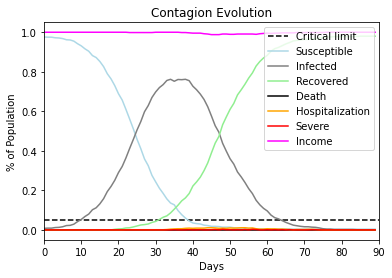

In [8]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

To save time these samples were run with 3 runs, but significant results often require 30 runs, so these numbers should be changed during debugging.

Save these seeds if you want to rerun a scenario
[8178, 3665, 4852, 1529, 4337, 7861, 5768, 9525, 5436, 6865, 2762, 4078, 9502, 8381, 7054, 8374, 8349, 5970, 6650, 1200, 475, 2926, 706, 3502, 9168, 2328, 7035, 8101, 381, 5753, 6783, 3022, 8025, 9166, 37, 1204, 9412, 1463, 5361, 4383, 785, 6594, 5534, 2148, 8898, 5839, 1242, 9894, 2725, 9582]
run with seed 8178:
run with seed 3665:
run with seed 4852:
run with seed 1529:
run with seed 4337:
run with seed 7861:
run with seed 5768:
run with seed 9525:
run with seed 5436:
run with seed 6865:
run with seed 2762:
run with seed 4078:
run with seed 9502:
run with seed 8381:
run with seed 7054:
run with seed 8374:
run with seed 8349:
run with seed 5970:
run with seed 6650:
run with seed 1200:
run with seed 475:
run with seed 2926:
run with seed 706:
run with seed 3502:
run with seed 9168:
run with seed 2328:
run with seed 7035:
run with seed 8101:
run with seed 381:
run with seed 5753:
run with seed 6783:
run with seed 3022:
run with seed 8025:

(<function dict.items>, <function dict.items>, <function dict.items>)

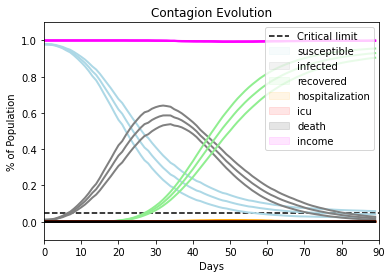

In [9]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisk1", do_print = True)

## Scenario 2

Complete lockdown

In [10]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 2
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]
set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)

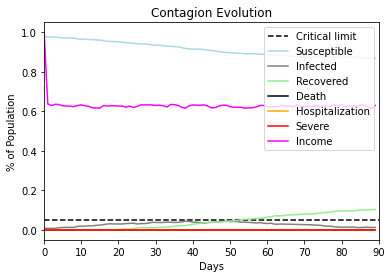

In [11]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[167, 4807, 280, 8146, 9893, 515, 5752, 7709, 7979, 9861, 8893, 4612, 3473, 8631, 6465, 4353, 9465, 8526, 6472, 1164, 2626, 2919, 464, 168, 5358, 9715, 1928, 8739, 7519, 9807, 567, 9541, 421, 2487, 6135, 1005, 9092, 1860, 632, 1841, 3652, 5984, 9484, 5349, 756, 2625, 1472, 2184, 436, 2271]
run with seed 167:
run with seed 4807:
run with seed 280:
run with seed 8146:
run with seed 9893:
run with seed 515:
run with seed 5752:
run with seed 7709:
run with seed 7979:
run with seed 9861:
run with seed 8893:
run with seed 4612:
run with seed 3473:
run with seed 8631:
run with seed 6465:
run with seed 4353:
run with seed 9465:
run with seed 8526:
run with seed 6472:
run with seed 1164:
run with seed 2626:
run with seed 2919:
run with seed 464:
run with seed 168:
run with seed 5358:
run with seed 9715:
run with seed 1928:
run with seed 8739:
run with seed 7519:
run with seed 9807:
run with seed 567:
run with seed 9541:
run with seed 421:
run wit

(<function dict.items>, <function dict.items>, <function dict.items>)

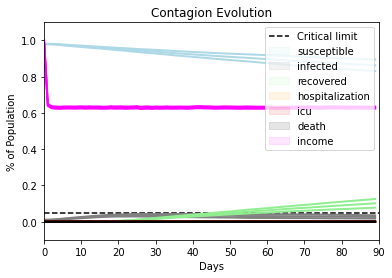

In [12]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisk2", do_print = True)

## Scenario 3

Start with complete lockdown then gradually unlock schools on simulation day 30, 60 and 90


In [13]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 3
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

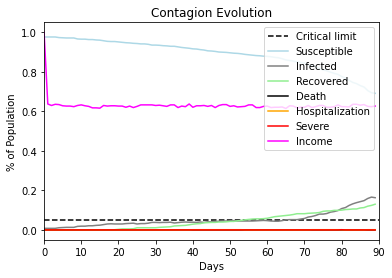

In [14]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[1799, 1387, 7594, 4004, 2715, 39, 1427, 4742, 467, 5694, 2071, 9443, 2485, 3148, 3542, 2861, 8905, 5649, 566, 9594, 4763, 5297, 1263, 8885, 4110, 3166, 9705, 1718, 4940, 4586, 5897, 9273, 7580, 7565, 3360, 9991, 5815, 4919, 2412, 5857, 6836, 6828, 4488, 138, 1302, 5372, 213, 9744, 3293, 9535]
run with seed 1799:
run with seed 1387:
run with seed 7594:
run with seed 4004:
run with seed 2715:
run with seed 39:
run with seed 1427:
run with seed 4742:
run with seed 467:
run with seed 5694:
run with seed 2071:
run with seed 9443:
run with seed 2485:
run with seed 3148:
run with seed 3542:
run with seed 2861:
run with seed 8905:
run with seed 5649:
run with seed 566:
run with seed 9594:
run with seed 4763:
run with seed 5297:
run with seed 1263:
run with seed 8885:
run with seed 4110:
run with seed 3166:
run with seed 9705:
run with seed 1718:
run with seed 4940:
run with seed 4586:
run with seed 5897:
run with seed 9273:
run with seed 7580:


(<function dict.items>, <function dict.items>, <function dict.items>)

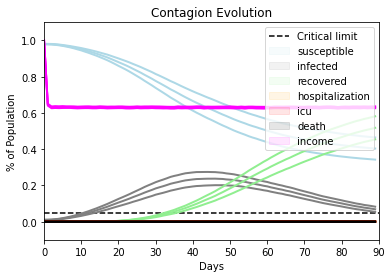

In [15]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisk3", do_print = True)

## Scenario 4

Like scenario 3 but simulate the start of a public campaing in day 30 to reinforce the importance of social distancing and consequently reduce the overall risk tolerance of the population

In [16]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 4
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

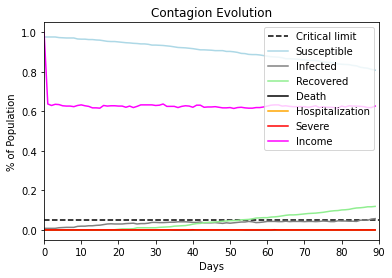

In [17]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[6272, 4771, 6206, 9797, 6902, 4279, 2283, 4469, 258, 7928, 5710, 3722, 4408, 1088, 2468, 7835, 2901, 6273, 5678, 3125, 6851, 3565, 8675, 5557, 5538, 6887, 3779, 8768, 1522, 1016, 5527, 8464, 3680, 1941, 2340, 495, 8341, 954, 6751, 6000, 9458, 2560, 8337, 5003, 3457, 2671, 2436, 13, 5530, 89]
run with seed 6272:
run with seed 4771:
run with seed 6206:
run with seed 9797:
run with seed 6902:
run with seed 4279:
run with seed 2283:
run with seed 4469:
run with seed 258:
run with seed 7928:
run with seed 5710:
run with seed 3722:
run with seed 4408:
run with seed 1088:
run with seed 2468:
run with seed 7835:
run with seed 2901:
run with seed 6273:
run with seed 5678:
run with seed 3125:
run with seed 6851:
run with seed 3565:
run with seed 8675:
run with seed 5557:
run with seed 5538:
run with seed 6887:
run with seed 3779:
run with seed 8768:
run with seed 1522:
run with seed 1016:
run with seed 5527:
run with seed 8464:
run with seed 3680

(<function dict.items>, <function dict.items>, <function dict.items>)

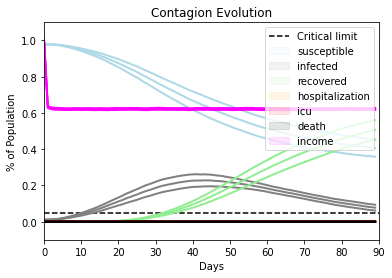

In [18]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisk4", do_print = True)

## Scenario 5

Like scenario 4 but start the campaing in day 1

In [19]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 5
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

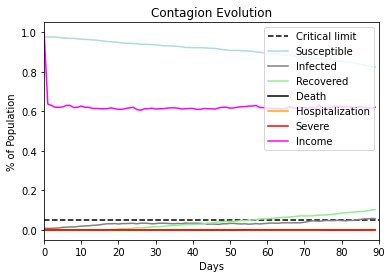

In [20]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[1368, 9676, 2824, 2643, 6590, 7519, 7210, 7625, 7505, 4187, 3992, 3078, 9884, 6071, 8035, 3567, 3549, 6332, 1486, 1432, 7349, 8904, 4948, 6326, 9129, 5718, 6157, 8965, 7077, 2841, 5554, 2936, 6297, 6123, 9213, 3512, 4343, 723, 8558, 971, 6405, 6996, 3009, 8801, 3226, 1145, 8853, 7141, 6806, 4640]
run with seed 1368:
run with seed 9676:
run with seed 2824:
run with seed 2643:
run with seed 6590:
run with seed 7519:
run with seed 7210:
run with seed 7625:
run with seed 7505:
run with seed 4187:
run with seed 3992:
run with seed 3078:
run with seed 9884:
run with seed 6071:
run with seed 8035:
run with seed 3567:
run with seed 3549:
run with seed 6332:
run with seed 1486:
run with seed 1432:
run with seed 7349:
run with seed 8904:
run with seed 4948:
run with seed 6326:
run with seed 9129:
run with seed 5718:
run with seed 6157:
run with seed 8965:
run with seed 7077:
run with seed 2841:
run with seed 5554:
run with seed 2936:
run with see

(<function dict.items>, <function dict.items>, <function dict.items>)

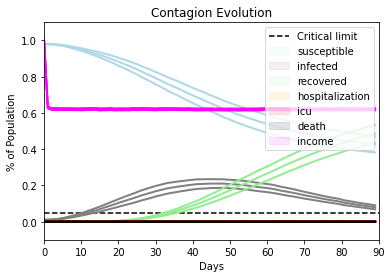

In [21]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisk5", do_print = True)

## Scenario 6

Begins with complete lockdown for 30 days, then all sectors are being gradually "unlocked"

In [22]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 6
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

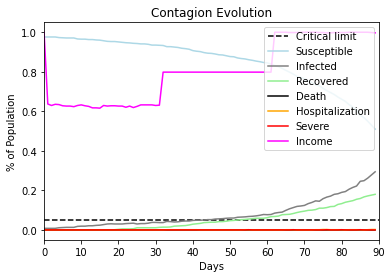

In [23]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[514, 9661, 3179, 4003, 9695, 2124, 556, 4802, 8115, 4905, 9113, 2657, 2970, 8609, 8562, 2766, 8387, 4812, 8509, 6461, 3363, 9812, 1765, 8426, 4694, 6759, 9598, 3959, 6420, 8267, 9052, 2278, 2233, 612, 4445, 5302, 6752, 7081, 5501, 9427, 9651, 1041, 7239, 7912, 5187, 8588, 776, 2920, 5798, 8410]
run with seed 514:
run with seed 9661:
run with seed 3179:
run with seed 4003:
run with seed 9695:
run with seed 2124:
run with seed 556:
run with seed 4802:
run with seed 8115:
run with seed 4905:
run with seed 9113:
run with seed 2657:
run with seed 2970:
run with seed 8609:
run with seed 8562:
run with seed 2766:
run with seed 8387:
run with seed 4812:
run with seed 8509:
run with seed 6461:
run with seed 3363:
run with seed 9812:
run with seed 1765:
run with seed 8426:
run with seed 4694:
run with seed 6759:
run with seed 9598:
run with seed 3959:
run with seed 6420:
run with seed 8267:
run with seed 9052:
run with seed 2278:
run with seed 22

(<function dict.items>, <function dict.items>, <function dict.items>)

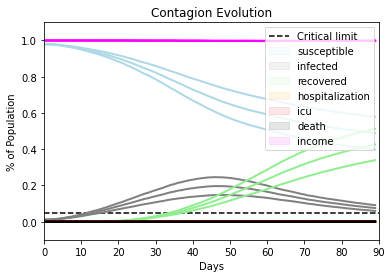

In [24]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisk6", do_print = True)

## Scenario 7

Like scenario 6 but in day 1 a campaign to encourage social distancing is started and the overall risk tolerance of people starts decreasing gradually.

In [25]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 7
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

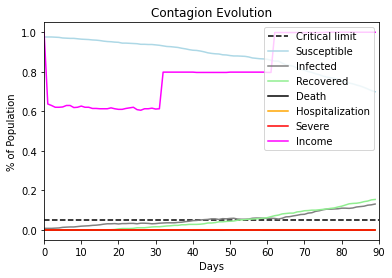

In [26]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[1565, 337, 6774, 8869, 6108, 6042, 2459, 9812, 4977, 4843, 1660, 3557, 4398, 7266, 614, 3116, 1677, 5089, 2348, 1260, 4227, 458, 700, 1013, 5911, 8108, 6370, 5132, 329, 7299, 4927, 7519, 1499, 2183, 38, 5208, 3270, 9960, 7041, 4672, 102, 6417, 348, 103, 5759, 343, 3528, 2383, 9495, 1792]
run with seed 1565:
run with seed 337:
run with seed 6774:
run with seed 8869:
run with seed 6108:
run with seed 6042:
run with seed 2459:
run with seed 9812:
run with seed 4977:
run with seed 4843:
run with seed 1660:
run with seed 3557:
run with seed 4398:
run with seed 7266:
run with seed 614:
run with seed 3116:
run with seed 1677:
run with seed 5089:
run with seed 2348:
run with seed 1260:
run with seed 4227:
run with seed 458:
run with seed 700:
run with seed 1013:
run with seed 5911:
run with seed 8108:
run with seed 6370:
run with seed 5132:
run with seed 329:
run with seed 7299:
run with seed 4927:
run with seed 7519:
run with seed 1499:
run wi

(<function dict.items>, <function dict.items>, <function dict.items>)

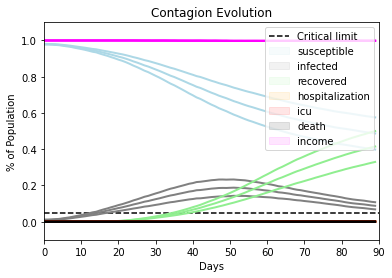

In [27]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisk7", do_print = True)